In [1]:
!pip install imbalanced-learn
!pip install graphviz
!pip install tensorflow-probability

# to generate gifs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-pb1g7vlz
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-pb1g7vlz
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184468 sha256=9c23ebecadbffbe975c8a9a45d18da014cd16b87178770838fb0aaa227fd344e
  Stored in directory: /tmp/pip-ephem-wheel-cache-16gqzvh0/wheels/3b/ee/a2/ab4d36a9a4af495bcb936f3e849d4b497b65fa40548a68d6c3
Successfully built tensorflow-docs


In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import utils

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image

import IPython
import IPython.display

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

import os
import zipfile

import glob
import imageio
import PIL
import time

from scipy import ndimage, misc
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with zipfile.ZipFile('/content/drive/MyDrive/jhu_crowd_v2.0.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/jhu_crowd')

In [5]:
base_dir = '/content/jhu_crowd/jhu_crowd_v2.0'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [6]:
os.listdir(base_dir)

['README', 'val', 'train', 'test', 'License']

In [17]:
trainLen = len(os.listdir(os.path.join(train_dir, 'gt')))
trainLen

2272

In [18]:
valLen = len(os.listdir(os.path.join(val_dir, 'gt')))
valLen

500

In [19]:
testLen = len(os.listdir(os.path.join(test_dir, 'gt')))
testLen

1600

In [21]:
totLen = trainLen + valLen + testLen
totLen

4372

([<matplotlib.patches.Wedge at 0x7f7a046c6c70>,
 [Text(-0.06793347576396098, 1.097900288218665, 'train'),
  Text(-0.97422766965198, -0.5107645716809973, 'val'),
  Text(0.44962349725401707, -1.0039117046419308, 'test')])

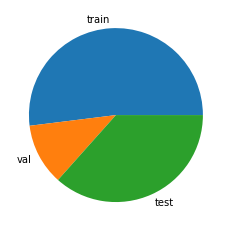

In [23]:
plt.pie([trainLen, valLen, testLen], labels = ['train', 'val', 'test'])

In [7]:
image_list = []
for filename in sorted(glob.glob('/content/jhu_crowd/jhu_crowd_v2.0/train/images/*.jpg')):
    im=PIL.Image.open(filename)
    image_list.append(im)

In [8]:
len(image_list)

2272

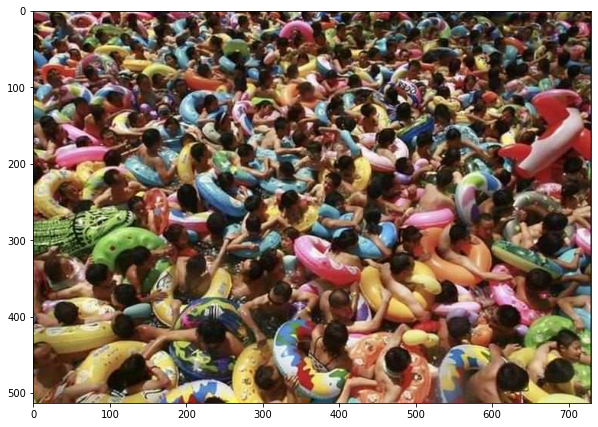

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(image_list[0])

In [10]:
gt_list = []
for filename in sorted(glob.glob('/content/jhu_crowd/jhu_crowd_v2.0/train/gt/*.txt')):
    faces = []
    with open(filename,'r') as data_file:
        for line in data_file:
            data = line.split()
            face = (int(data[0]), int(data[1]))
            faces.append(face)
    gt_list.append(faces)

In [11]:
gt_list[0]

[(106, 114),
 (705, 79),
 (661, 361),
 (212, 332),
 (704, 236),
 (620, 404),
 (615, 248),
 (641, 165),
 (676, 47),
 (422, 29),
 (71, 48),
 (107, 62),
 (76, 85),
 (692, 37),
 (251, 221),
 (535, 44),
 (528, 93),
 (36, 46),
 (240, 44),
 (467, 115),
 (497, 79),
 (484, 204),
 (342, 136),
 (326, 152),
 (404, 379),
 (469, 229),
 (267, 57),
 (447, 56),
 (411, 296),
 (102, 195),
 (43, 394),
 (179, 65),
 (675, 27),
 (640, 76),
 (295, 49),
 (170, 133),
 (275, 18),
 (624, 479),
 (338, 82),
 (510, 170),
 (386, 226),
 (118, 411),
 (137, 255),
 (608, 62),
 (551, 168),
 (207, 55),
 (62, 16),
 (590, 283),
 (577, 35),
 (357, 104),
 (229, 426),
 (331, 210),
 (485, 59),
 (189, 292),
 (277, 334),
 (410, 203),
 (53, 61),
 (535, 134),
 (626, 73),
 (647, 60),
 (555, 292),
 (412, 150),
 (560, 41),
 (27, 89),
 (482, 333),
 (493, 301),
 (476, 457),
 (350, 167),
 (704, 209),
 (166, 24),
 (193, 101),
 (89, 37),
 (107, 221),
 (393, 124),
 (141, 322),
 (540, 368),
 (201, 242),
 (121, 37),
 (238, 276),
 (302, 19),
 (

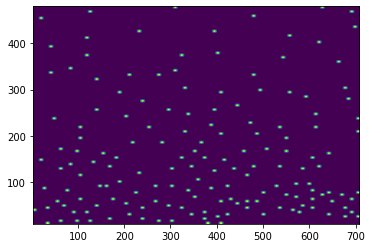

In [30]:
x = [a[0] for a in gt_list[0]]
y = [a[1] for a in gt_list[0]]
heatmap, xbounds, ybounds = np.histogram2d(x, y, bins=100)
extent = [xbounds[0], xbounds[-1], ybounds[0], ybounds[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [34]:
len(gt_list[0])

161

In [32]:
heatmap.sum()

161.0

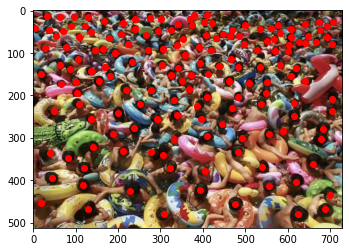

In [12]:
for coords in gt_list[0]:
    plt.plot(coords[0], coords[1], marker='o', color="red")
plt.imshow(image_list[0])